In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression # Importing PLSRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Volumetric_features.xlsx')
df.to_csv('Volumetric_features.csv', index=False)

In [3]:
x = df.iloc[:, df.columns != 'Age']
y = df.iloc[:, 139]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

linreg=LinearRegression()
linreg.fit(x_train,y_train)

pls = PLSRegression(n_components=8)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_test)

In [4]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 83.92


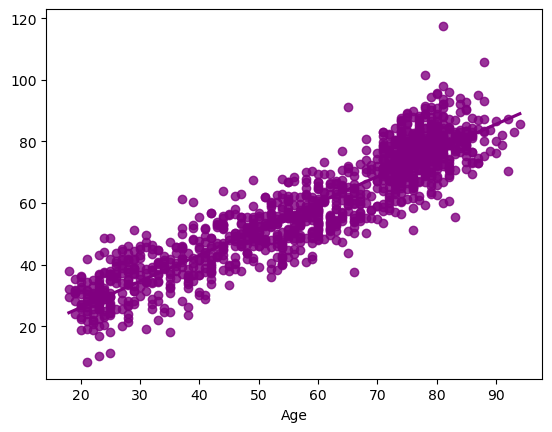

In [5]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='purple');

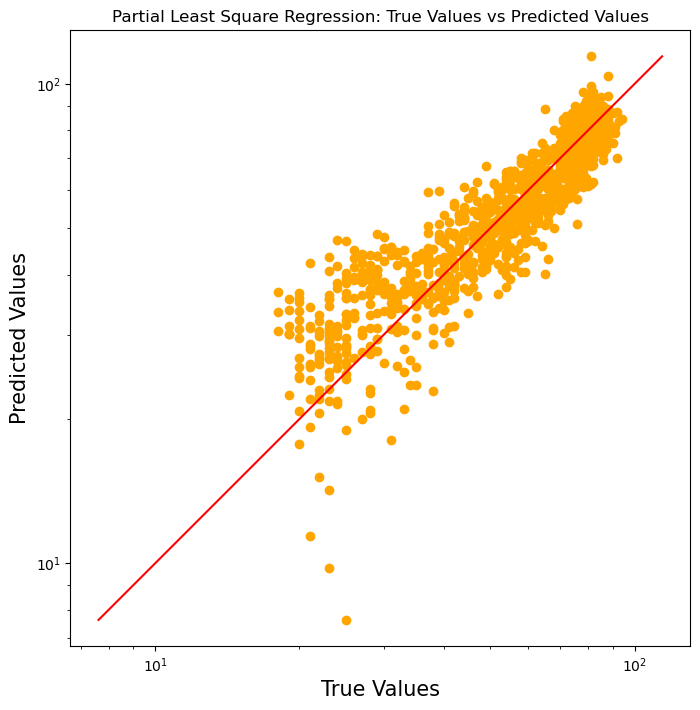

In [6]:
true_val = y_test
pred_val = linreg.predict(x_test)
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='orange')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Partial Least Square Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()